In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('house_price.csv')

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


# 1) Perform basic EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [7]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [15]:
df.shape

(13200, 7)

In [19]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


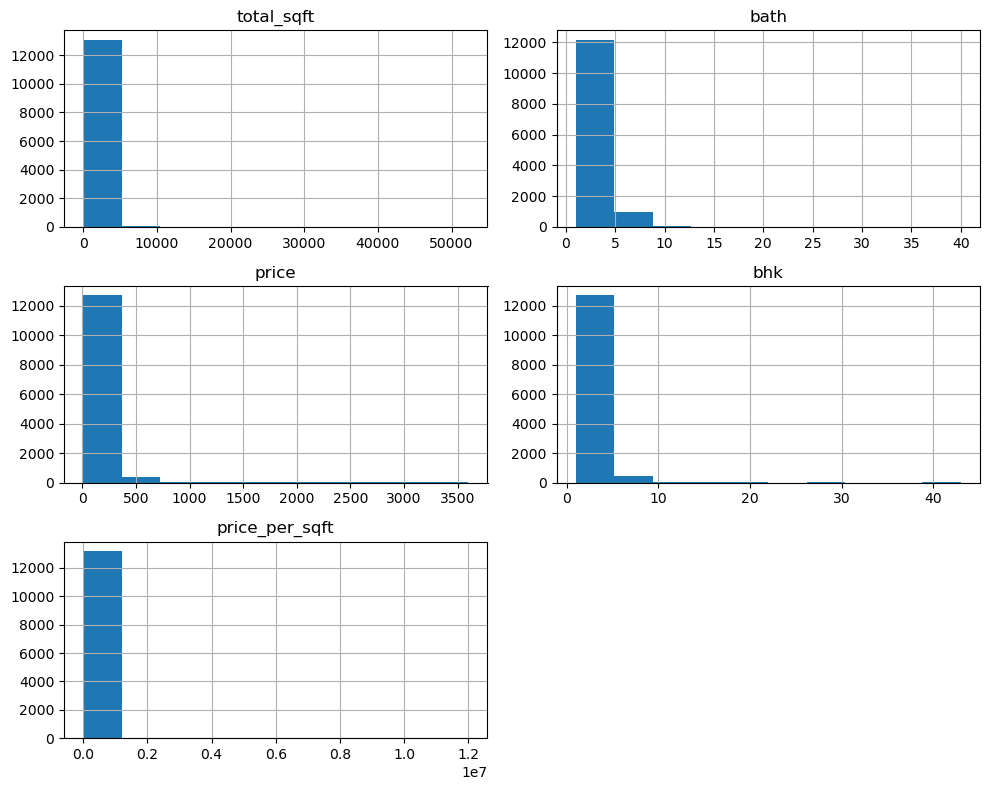

In [21]:
# distribution of columns
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

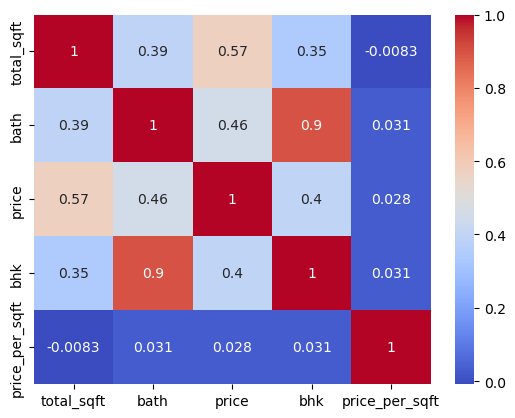

In [25]:
numeric_df=df.select_dtypes(include=['number'])
corr=numeric_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

# 2) Detecting outliers and treating them

In [ ]:
a)  using Mean and Standard deviation

In [21]:
mean=df['price_per_sqft'].mean()
std=df['price_per_sqft'].std()
lower_bound= mean - 3 * std
upper_bound= mean + 3 * std
outliers_m=df[(df['price_per_sqft']<lower_bound) | (df['price_per_sqft']>upper_bound)]
print(outliers_m)

             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


In [ ]:
b)Percentile method

In [13]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
IQR= q3-q1
lb= q1- 1.5 * IQR
ub= q3 + 1.5 * IQR
outliers_p=df[(df['price_per_sqft']<lb) | (df['price_per_sqft']>ub)]
print(outliers_p)

               location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
22          Thanisandra  4 Bedroom      2800.0   5.0  380.0    4   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
48             KR Puram  2 Bedroom       800.0   1.0  130.0    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK      1140.0   1.0  185.0    2   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   

       price_per_sqft  
7               18181  
9               36274  
22              13571  
45              33333  
48              16250  
...               ...  
13142          

In [41]:
len(outliers_p)

1265

In [ ]:
c) IQR(Inter quartile range method)

In [15]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
IQR= q3-q1
lb= q1- 1.5 * IQR
ub= q3 + 1.5 * IQR
outliers_IQR=df[(df['price_per_sqft']<lb) | (df['price_per_sqft']>ub)]

In [17]:
outliers_IQR

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [ ]:
d) Z Score method
z=(x-mean) / std

In [17]:
z_score_price_per_sqft = stats.zscore(df['price_per_sqft'])
outliers_z = df[(np.abs(z_score_price_per_sqft)>3)]

In [19]:
outliers_z

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [39]:
# replacing outliers with median
median=df['price_per_sqft'].median()
df['price_per_sqft']=np.where((df['price_per_sqft']<lb) | (df['price_per_sqft']>ub),median,df['price_per_sqft'])

# 3)Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 

C:\Users\thask\AppData\Local\Temp\ipykernel_27264\2281119234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='method',y='price_per_sqft',data=combined,palette='viridis')


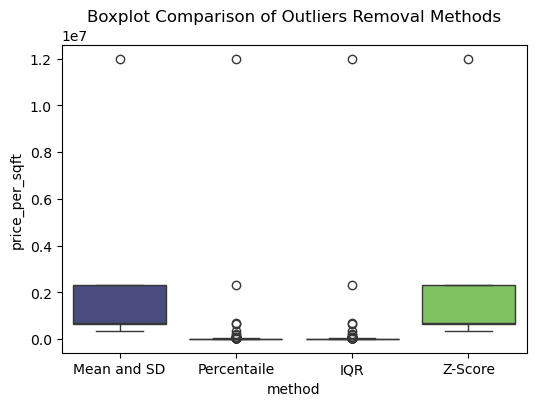

In [41]:
outliers_m['method']='Mean and SD'
outliers_p['method']='Percentaile'
outliers_IQR['method']='IQR'
outliers_z['method']='Z-Score'
combined=pd.concat([outliers_m,outliers_p,outliers_IQR,outliers_z])
plt.figure(figsize=(6,4))
sns.boxplot(x='method',y='price_per_sqft',data=combined,palette='viridis')
plt.title('Boxplot Comparison of Outliers Removal Methods')
plt.show()


# 4) histplot 

In [43]:
df['price_per_sqft'].skew()

108.28105529705168

In [45]:
df['price_per_sqft'].kurtosis()

12095.21502832288

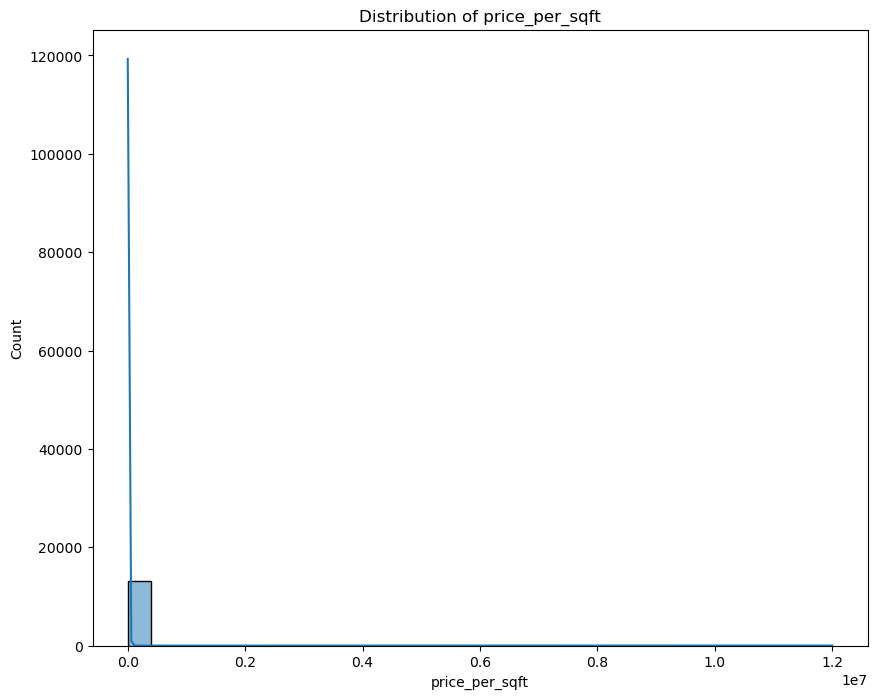

In [47]:
# befor treating  
plt.figure(figsize = (10,8))
sns.histplot(df['price_per_sqft'], kde = True, bins = 30)
plt.title('Distribution of price_per_sqft')
plt.show()

In [49]:
# Handling skewness
if df['price_per_sqft'].skew()>1 or df['price_per_sqft'].skew()<-1:
    df['price_per_sqft'] = np.log1p(df['price_per_sqft'])

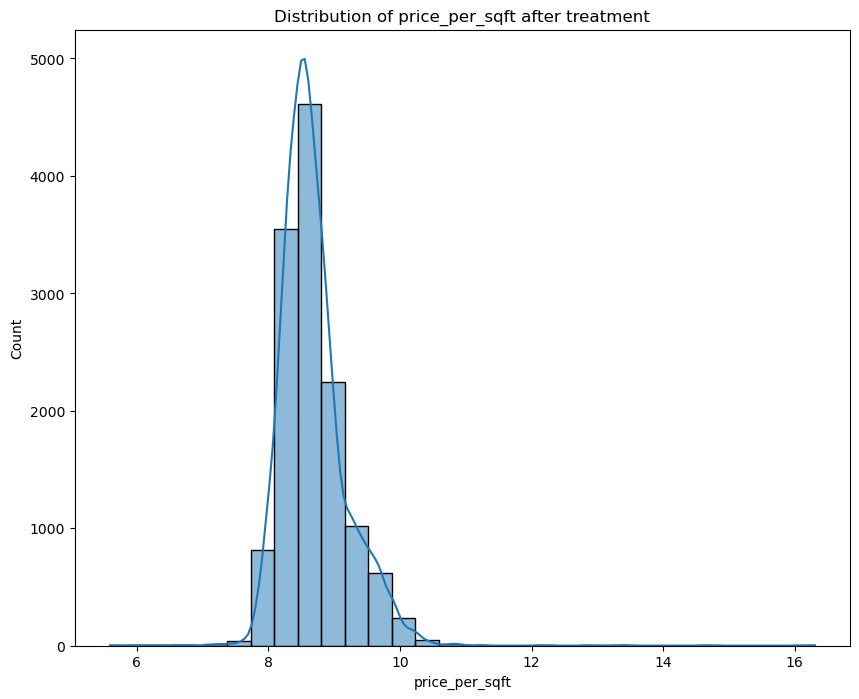

In [55]:
# after treatment
plt.figure(figsize = (10,8))
sns.histplot(df['price_per_sqft'], kde = True, bins = 30)
plt.title('Distribution of price_per_sqft after treatment')
plt.show()

# 5) Heatmap

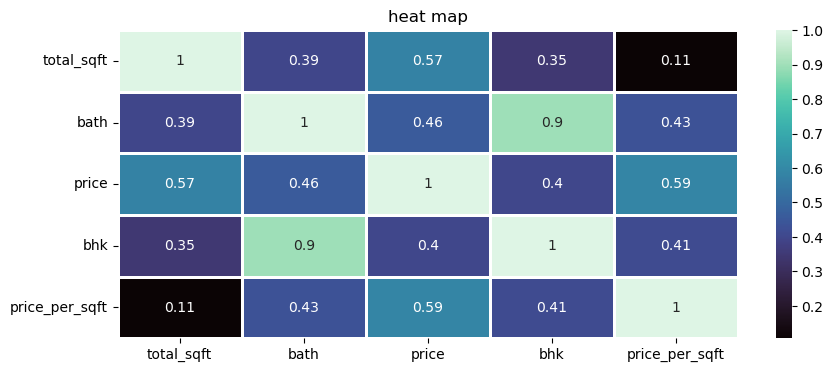

In [63]:
# heat map of this correlation
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='mako',linewidth=0.8)
plt.title('heat map')
plt.show()

# 6) Draw Scatter plot between the variables to check the correlation between them. 

In [59]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

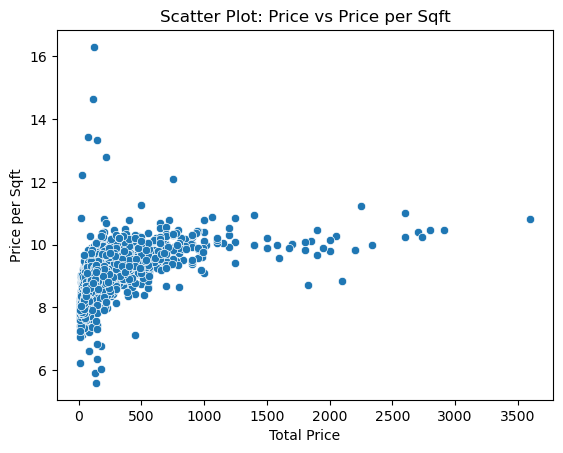

In [65]:
sns.scatterplot(x='price', y='price_per_sqft', data=df)
plt.title('Scatter Plot: Price vs Price per Sqft')
plt.xlabel('Total Price')
plt.ylabel('Price per Sqft')
plt.show()

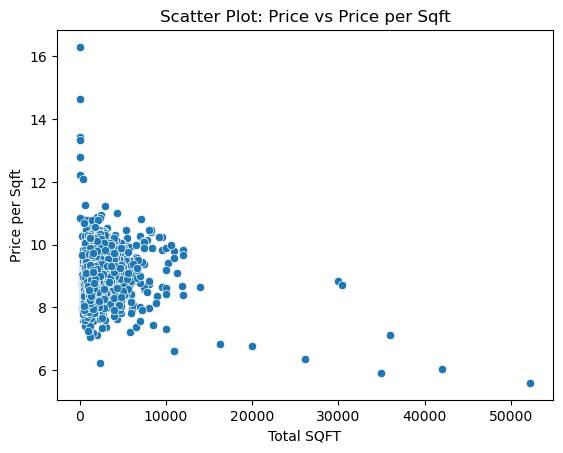

In [67]:
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=df)
plt.title('Scatter Plot: Price vs Price per Sqft')
plt.xlabel('Total SQFT')
plt.ylabel('Price per Sqft')
plt.show()